<a href="https://colab.research.google.com/github/ATUL5509/Capstone-Project/blob/main/Machine_Learning_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score



In [43]:
df = pd.read_csv('Credit Card Fraud Detection.csv')

In [44]:
display(df.head())

,age,income,loan_amount,credit_score,employment_status,default(y),loan_term,interest_rate,debt_to_income_ratio,num_of_dependents,education_level,home_ownership,marital_status,credit_history_length,num_credit_lines,late_payments,bankruptcies,annual_savings,retirement_savings,monthly_expenses
0,38,71440,27069,689,self-employed,1,36,9.937874,31.046101,0,high_school,rent,married,7,6,1,1,25259,195208,6037
1,36,90200,14895,578,employed,0,48,13.624882,21.845252,0,high_school,own,married,11,16,8,0,40761,152999,4064
2,47,85896,2613,352,employed,1,12,6.676366,12.562405,1,bachelor,mortgage,divorced,24,2,2,0,34857,67487,2848
3,38,20121,3163,622,unemployed,0,48,12.833366,17.144545,1,master,own,married,12,4,6,1,16048,98869,7721
4,44,77529,37731,615,self-employed,0,12,4.111636,35.892430,3,high_school,own,single,27,7,5,0,5668,42397,8009


In [45]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    100000 non-null  int64  
 1   income                 100000 non-null  int64  
 2   loan_amount            100000 non-null  int64  
 3   credit_score           100000 non-null  int64  
 4   employment_status      100000 non-null  object 
 5   default(y)             100000 non-null  int64  
 6   loan_term              100000 non-null  int64  
 7   interest_rate          100000 non-null  float64
 8   debt_to_income_ratio   100000 non-null  float64
 9   num_of_dependents      100000 non-null  int64  
 10  education_level        100000 non-null  object 
 11  home_ownership         100000 non-null  object 
 12  marital_status         100000 non-null  object 
 13  credit_history_length  100000 non-null  int64  
 14  num_credit_lines       100000 non-nul

In [46]:
print(df.describe())

                 age         income    loan_amount   credit_score  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       42.462720   60012.224960   25519.561950     573.806760   
std        12.690258   23093.209173   14136.260198     158.581563   
min        21.000000   20000.000000    1000.000000     300.000000   
25%        31.000000   39935.750000   13311.750000     437.000000   
50%        42.000000   60175.000000   25583.000000     574.000000   
75%        53.000000   79991.000000   37771.000000     710.000000   
max        64.000000   99998.000000   49999.000000     849.000000   

          default(y)      loan_term  interest_rate  debt_to_income_ratio  \
count  100000.000000  100000.000000  100000.000000         100000.000000   
mean        0.500940      36.025560       9.254996             29.995874   
std         0.500002      16.964051       3.318369             11.563967   
min         0.000000      12.000000       3.500245             10.000275  

In [47]:
# Check for missing values, duplicates, and outliers
print(df.isnull().sum())
print(df.duplicated().sum())


age                      0
income                   0
loan_amount              0
credit_score             0
employment_status        0
default(y)               0
loan_term                0
interest_rate            0
debt_to_income_ratio     0
num_of_dependents        0
education_level          0
home_ownership           0
marital_status           0
credit_history_length    0
num_credit_lines         0
late_payments            0
bankruptcies             0
annual_savings           0
retirement_savings       0
monthly_expenses         0
dtype: int64
0


In [48]:
print(df.columns)


Index(['age', 'income', 'loan_amount', 'credit_score', 'employment_status',
       'default(y)', 'loan_term', 'interest_rate', 'debt_to_income_ratio',
       'num_of_dependents', 'education_level', 'home_ownership',
       'marital_status', 'credit_history_length', 'num_credit_lines',
       'late_payments', 'bankruptcies', 'annual_savings', 'retirement_savings',
       'monthly_expenses'],
      dtype='object')


In [49]:
# Analyze class distribution
print(df['default(y)'].value_counts())

default(y)
1    50094
0    49906
Name: count, dtype: int64


In [30]:
# Exploratory Data Analysis (EDA)
# Tasks
# 1. Visualize the distribution of numerical features.
# 2. Analyze correlations between variables.
# 3. Compare default and non-default groups across key features.
# 4. Identify outliers in features like income, loan_amount, and credit_score.
# Questions
# Ques1. Which features show a strong correlation with default?
# Ques2.  Are there significant differences in income or loan amount between defaulters and non-defaulters?
# Ques3. Do credit scores impact the likelihood of default?

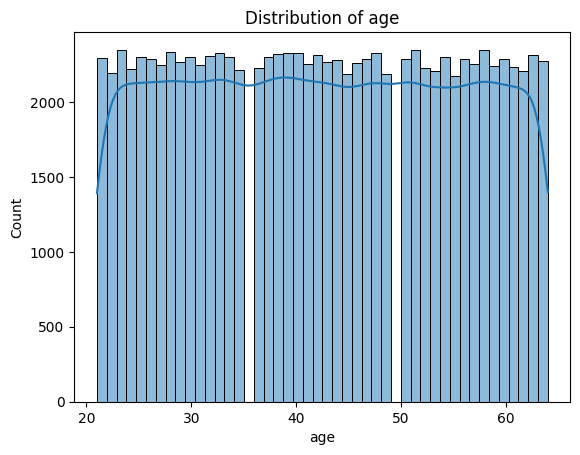

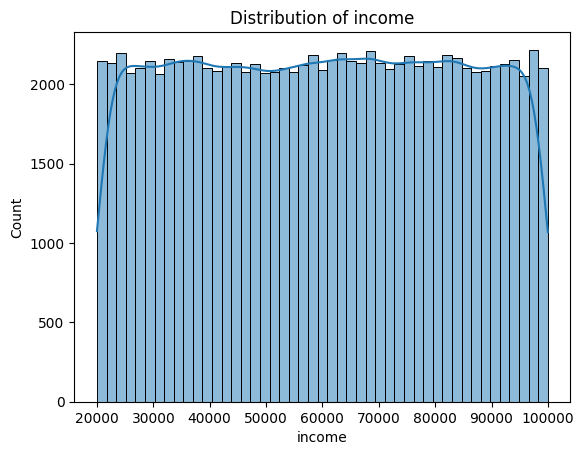

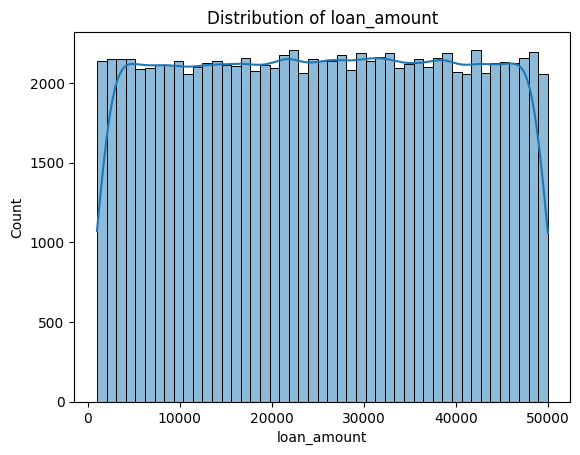

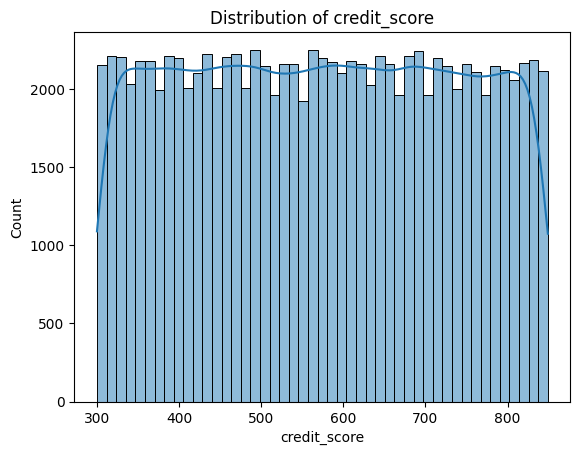

In [50]:
# Visualize the distribution of numerical features
for column in ['age', 'income', 'loan_amount', 'credit_score']:
  plt.figure()
  sns.histplot(data=df, x=column, kde=True)
  plt.title(f'Distribution of {column}')
  plt.show()

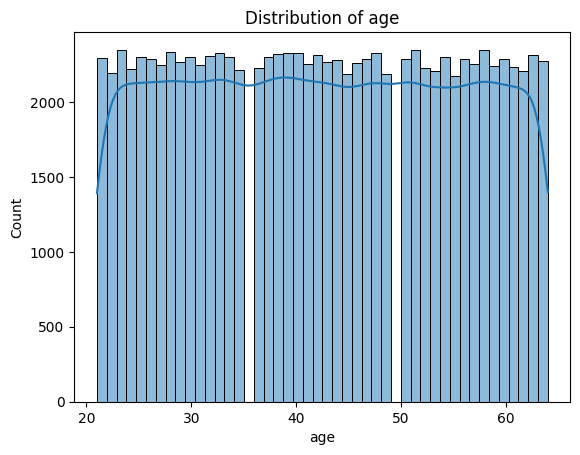

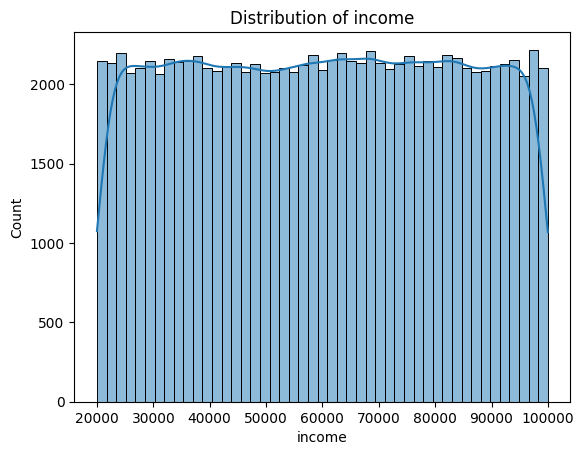

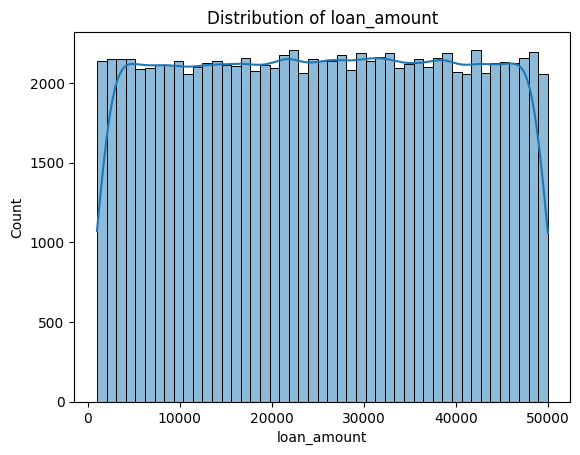

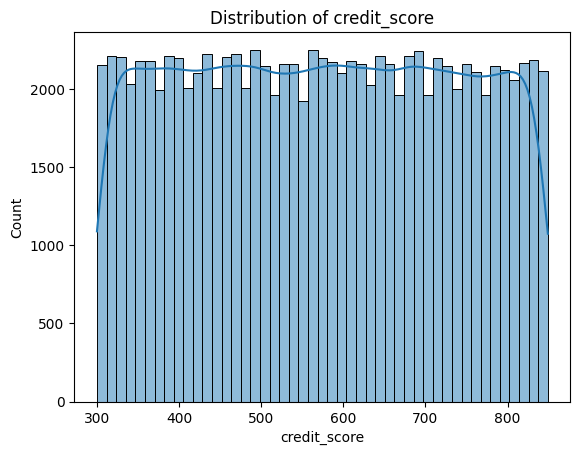

In [34]:
# Visualize the distribution of numerical features
for column in ['age', 'income', 'loan_amount', 'credit_score']:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [51]:
df = pd.get_dummies(df, columns=['employment_status'], drop_first=True)

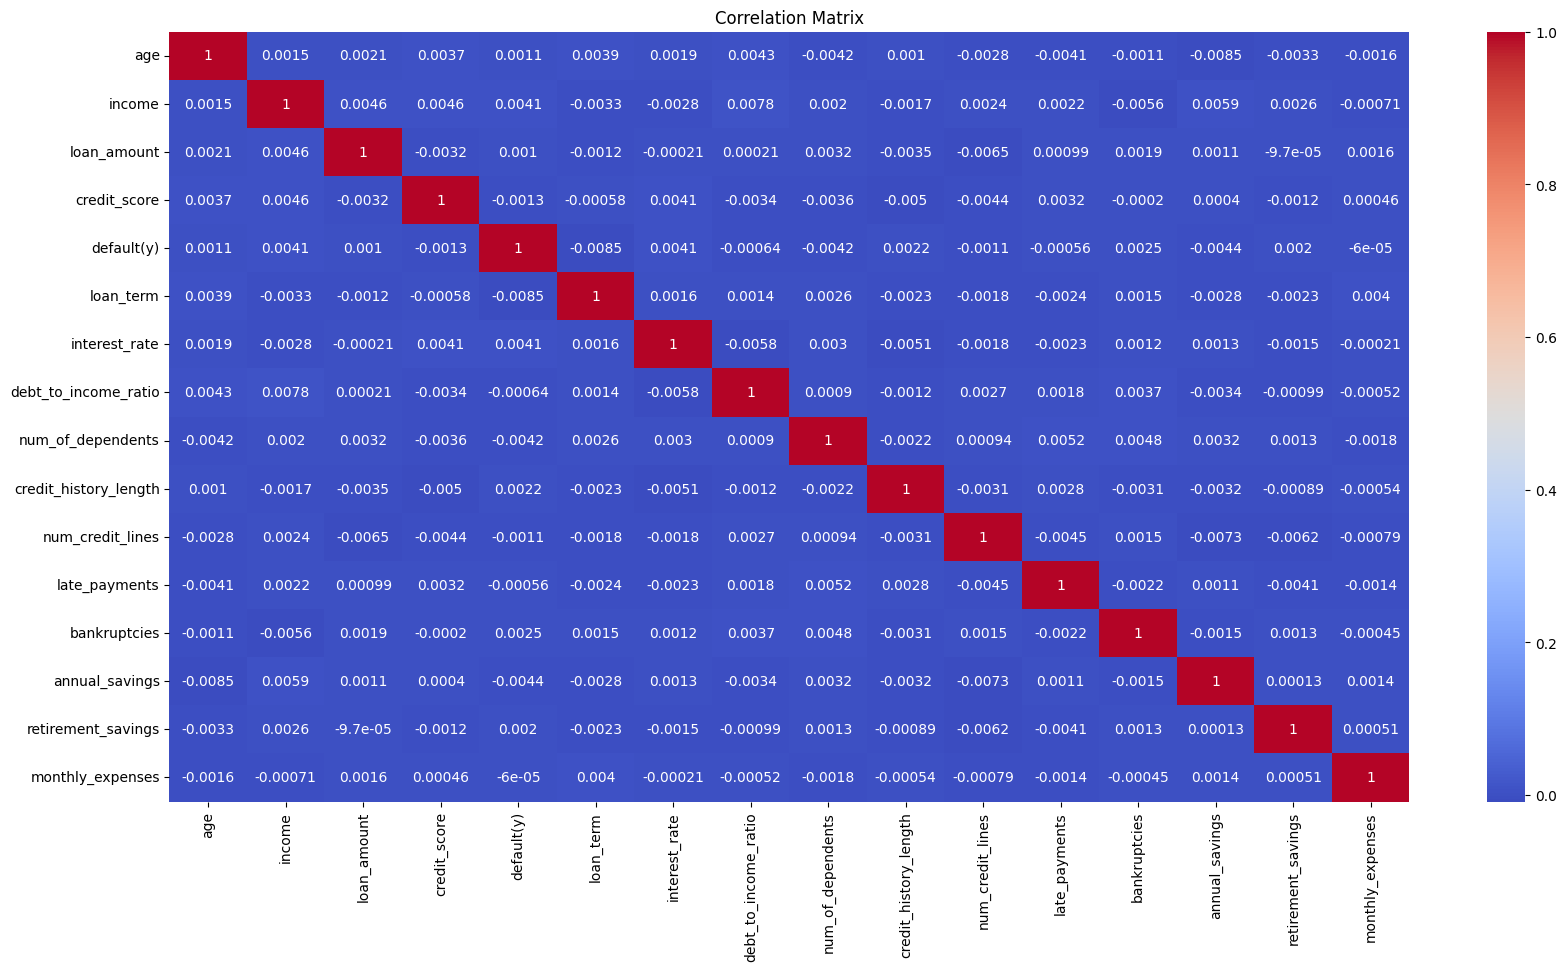

In [52]:
# Analyze correlations
correlation_matrix = df.select_dtypes(include=np.number).corr()  # Select only numerical columns for correlation
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [53]:
 #Compare default and non-default groups
 default_group = df[df['default(y)'] == 1]
 non_default_group = df[df['default(y)'] == 0]



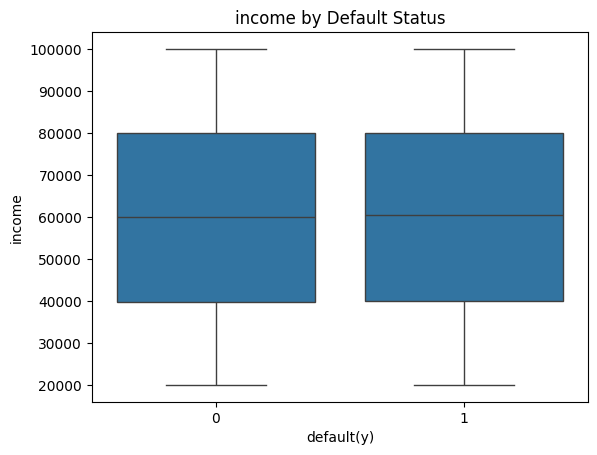

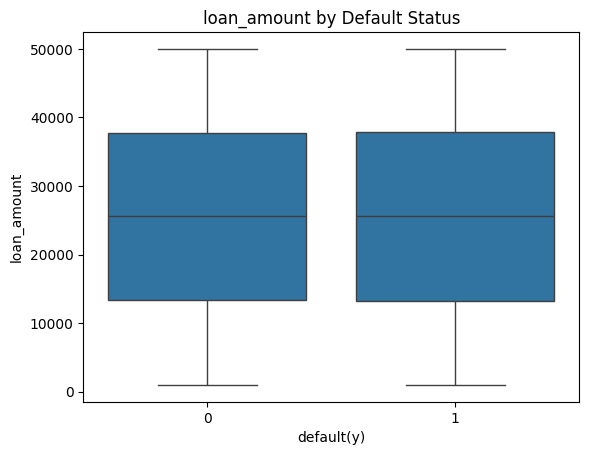

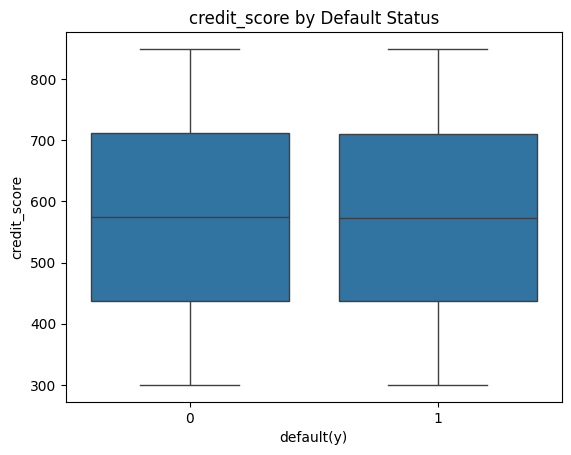

In [54]:
for column in ['income', 'loan_amount', 'credit_score']:
    plt.figure()
    sns.boxplot(x='default(y)', y=column, data=df) # Changed 'default' to 'default(y)'
    plt.title(f'{column} by Default Status')
    plt.show()



# 3. Data Preprocessing
 # Tasks
1. Handle missing values (imputation with mean/median/mode).
2. Convert categorical variables into numerical form (e.g., one-hot encoding).
3. Normalize numerical features (e.g., standardization or MinMax scaling).
4. Split the dataset into training (80%) and testing (20%) sets.
# Questions
1.  How will you handle missing values in categorical and numerical features?
2.  Why is it necessary to normalize numerical features?
3.  What technique would you use to convert categorical variables to numerical?

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [56]:
# Handle missing values for numerical features
numerical_features = df.select_dtypes(include=np.number).columns
imputer_numerical = SimpleImputer(strategy='median')
df[numerical_features] = imputer_numerical.fit_transform(df[numerical_features])

# Handle missing values for categorical features (if any)
categorical_features = df.select_dtypes(exclude=np.number).columns
imputer_categorical = SimpleImputer(strategy='most_frequent')  # Use most frequent for categorical
df[categorical_features] = imputer_categorical.fit_transform(df[categorical_features])

In [57]:
# Convert categorical variables to numerical
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[categorical_features])

In [58]:
# Normalize numerical features
scaler = StandardScaler(with_mean=False)
scaled_data = scaler.fit_transform(encoded_data)

In [59]:
# Split the dataset
X = scaled_data.drop('default', axis=1)
y = scaled_data['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

AttributeError: 'csr_matrix' object has no attribute 'drop'

In [60]:
# Assuming 'df' is your original DataFrame after handling missing values
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=np.number).columns.drop('default(y)')
categorical_features = df.select_dtypes(exclude=np.number).columns

# Create a ColumnTransformer to apply transformations separately
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Fit and transform the data
X = preprocessor.fit_transform(df)

# Get feature names after transformation
num_feature_names = list(numerical_features)
cat_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_names = num_feature_names + cat_feature_names

# Create a DataFrame with the transformed data and feature names
processed_data = pd.DataFrame(X, columns=feature_names)

# Split the dataset
X = processed_data
y = df['default(y)']  # Assuming 'default(y)' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Model Selection & Training

# TASKS
1. Train a Logistic Regression model as a baseline.
2. Experiment with Decision Tree, Random Forest, and Gradient Boosting models.
3. Compare models based on accuracy, precision, recall, and F1-score.
"Believe you can and you're halfway there."
Trainer: Mouna N from Learnbay
# QUESTIONS
1.  What is the advantage of using a Logistic Regression model as a baseline?
2.  Which model performs best, and why?
3.  What are the potential weaknesses of Decision Trees compared to Random Forest?

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [61]:
# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [62]:
# Assuming 'df' is your original DataFrame after handling missing values
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=np.number).columns.drop('default(y)')
categorical_features = df.select_dtypes(exclude=np.number).columns

# Create a ColumnTransformer to apply transformations separately
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Fit and transform the data
X = preprocessor.fit_transform(df)

# Get feature names after transformation
num_feature_names = list(numerical_features)
cat_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_names = num_feature_names + cat_feature_names

# Create a DataFrame with the transformed data and feature names
processed_data = pd.DataFrame(X, columns=feature_names)

# Split the dataset
X = processed_data
y = df['default(y)']  # Assuming 'default(y)' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [63]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [65]:
# Train Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

In [66]:
# Train Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)

In [67]:
# Train Gradient Boosting model
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train, y_train)
y_pred_boost = grad_boost.predict(X_test)

In [68]:
# Compare models
models = {
    'Logistic Regression': y_pred_log_reg,
    'Decision Tree': y_pred_tree,
    'Random Forest': y_pred_forest,
    'Gradient Boosting': y_pred_boost
}

In [69]:
for model_name, y_pred in models.items():
    print(f'{model_name}:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1-score: {f1_score(y_test, y_pred)}\n')

Logistic Regression:
Accuracy: 0.49635
Precision: 0.49506607929515417
Recall: 0.5640999899608473
F1-score: 0.5273333020505842

Decision Tree:
Accuracy: 0.49965
Precision: 0.4977132630741698
Recall: 0.5025599839373557
F1-score: 0.5001248813627054

Random Forest:
Accuracy: 0.4997
Precision: 0.49763132961364354
Recall: 0.4745507479168758
F1-score: 0.48581706063720453

Gradient Boosting:
Accuracy: 0.49675
Precision: 0.4952214666421614
Recall: 0.5410099387611685
F1-score: 0.5171040637144365



# 5.  Model Evaluation
# TASKS
1. Compute evaluation metrics: Accuracy, Precision, Recall, F1-score.
2. Generate a confusion matrix to analyze false positives and false negatives.
3. Use ROC-AUC to measure overall model performance.
# QUESTIONS
1.  Why is precision-recall more important than accuracy for this dataset?
2. How does the confusion matrix help in assessing model performance?
3. What does a high false negative rate indicate in credit risk prediction?

In [70]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [71]:
# Evaluate Logistic Regression model (as an example)
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])

In [72]:
print('Confusion Matrix:\n', conf_matrix)
print('ROC-AUC:', roc_auc)

Confusion Matrix:
 [[4308 5731]
 [4342 5619]]
ROC-AUC: 0.49811907639115194


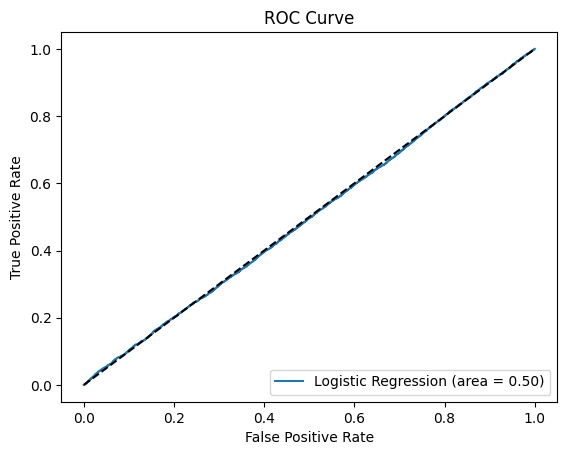

In [73]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. Hyperparameter Tuning
#  TASKS
1. Optimize model hyperparameters using Grid Search or Random Search.
2. Implement Cross-Validation to improve model reliability.
3. Compare results before and after tuning.
# QUESTIONS
1.  What are the key hyperparameters to tune in a Random Forest model?
2.  Why is cross-validation important?
3.  Did tuning significantly improve model performance?

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [5]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [8]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# SECOND

In [111]:
# Define parameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees
    'classifier__max_depth': [5, 10, 20],  # Depth of trees
    'classifier__min_samples_split': [2, 5, 10],  # Min samples to split a node
    'classifier__min_samples_leaf': [1, 2, 4]  # Min samples at a leaf
}

In [116]:
# Set up pipeline with Random Forest
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [117]:
# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    pipeline_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2
)

In [119]:
# Best parameters and model performance
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [120]:
# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    pipeline_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train) # This line is added

# Best parameters and model performance
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best Cross-Validation Accuracy: 0.5065999999999999


In [122]:
# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))
# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Tuned Model Accuracy: 0.4997
Tuned Model Accuracy: 0.4997
Precision: 0.49782839494257314
Recall: 0.5178194960345347
F1 Score: 0.5076272020470426
